In [1]:
import scvelo as scv
import matplotlib.pyplot as plt
import scanpy as sc
import cellrank as cr
import numpy as np
import pandas as pd
import anndata as ad
import scipy as sci
import os
#conda install numpy pandas matplotlib cellrank scvelo scanpy anndata scipy



In [2]:
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(10, 10))
plt.rcParams['axes.grid'] = False
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42


In [3]:
sc.settings.figdir = "fig5"


In [4]:
adata=sc.read_h5ad('/lustre/scratch126/cellgen/team298/ls34/adata_all.scvelo.preppedall3.lesionalonly2.3.integrated.moments2.plottedvelo2.renamed_v2')
{x:x for x in adata.obs["test2"].unique()}

{'F1: Superficial': 'F1: Superficial',
 'F2: Universal': 'F2: Universal',
 'F3: FRC-like': 'F3: FRC-like',
 'F6: Myofibroblast inflammatory': 'F6: Myofibroblast inflammatory',
 'F2/3: Stroma_PPARG+': 'F2/3: Stroma_PPARG+',
 'F6: Myofibroblast': 'F6: Myofibroblast'}

In [5]:
# RENAME = {'F1: Superficial': 'F1: Superficial',
#  'F2: Universal': 'F2: Universal',
#  'F3: FRC-like': 'F3: FRC-like',
#  'F6: Myofibroblast inflammatory': 'F6: Myofibroblast inflammatory',
#  'F2/3: Stroma_PPARG+': 'F2/3: Perivascular',
#  'F6: Myofibroblast': 'F7: Myofibroblast'}
# adata.obs["test2"]=adata.obs["test2"].map(RENAME) #.fillna(adata.obs["test2"])
# adata.obs["test2"]=adata.obs["test2"].astype('category')

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

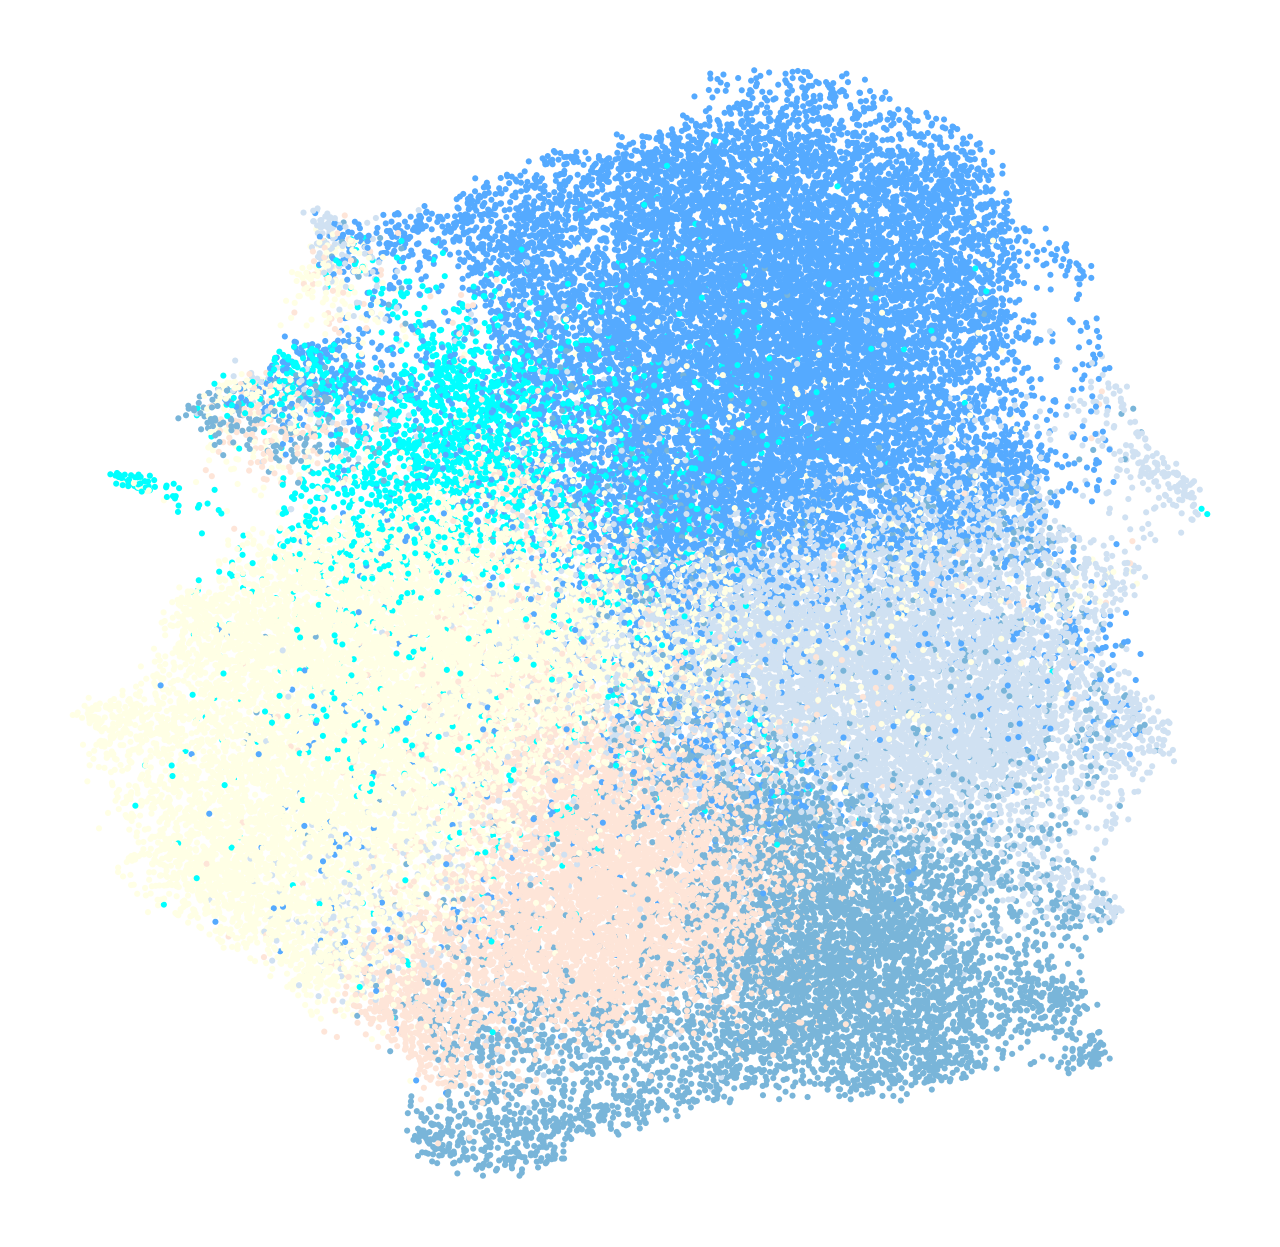

In [6]:
custom_colors = {'F1: Superficial': np.array([1.        , 1.        , 0.89803922, 1.        ]),
 'F1: EA-Regenerative': np.array([0.99607843, 0.80915033, 0.39607843, 1.        ]),
 'F2: Universal': np.array([0.81411765, 0.88392157, 0.94980392, 1.        ]),
 'F2/3: Stroma_PPARG+': np.array([0.47294118, 0.71163399, 0.85071895, 1.        ]),
 'F3: FRC-like': np.array([0.99692426, 0.89619377, 0.84890427, 1.        ]),
 'F4: DS_DPEP1+': np.array([0.82745098, 0.93254902, 0.80313725, 1.        ]),
 'F4: TNN+COCH+': np.array([0.50196078, 0.79058824, 0.50143791, 1.        ]),
 'F4: DP_HHIP+': np.array([0.15294118, 0.56183007, 0.28313725, 1.        ]),
 'F5: RAMP1+':np.array([0.6177624 , 0.60213764, 0.78345252, 1.        ]),
 'F5: NGFR+': np.array([0.47320261, 0.43267974, 0.69934641, 1.        ]),
 'F6: Myofibroblast inflammatory': np.array([0., 1., 1., 1.]),
 'F6: Myofibroblast': np.array([0.33333333, 0.66666667, 1.        , 1.        ]),
 'F7: Fascia-like myofibroblast': np.array([0.95686275, 0.55686275, 0.74509804, 1.0]),
 'F_Fascia': np.array([0, 0, 0, 0.3])
                               }

adata.obs["test2"]=adata.obs["test2"].astype('category')
try:
    adata.uns["test2_colors"] = [custom_colors[cat] for cat in adata.obs["test2"].cat.categories]
except KeyError as e:
    print(f"Error: Missing color for category {e}")

    
sc.pl.umap(
    adata,
    color='test2',
    show=False,
    frameon=False,
    legend_loc=None,
    legend_fontsize=5,
    s=30,
    title='',
    legend_fontoutline=2
)

 

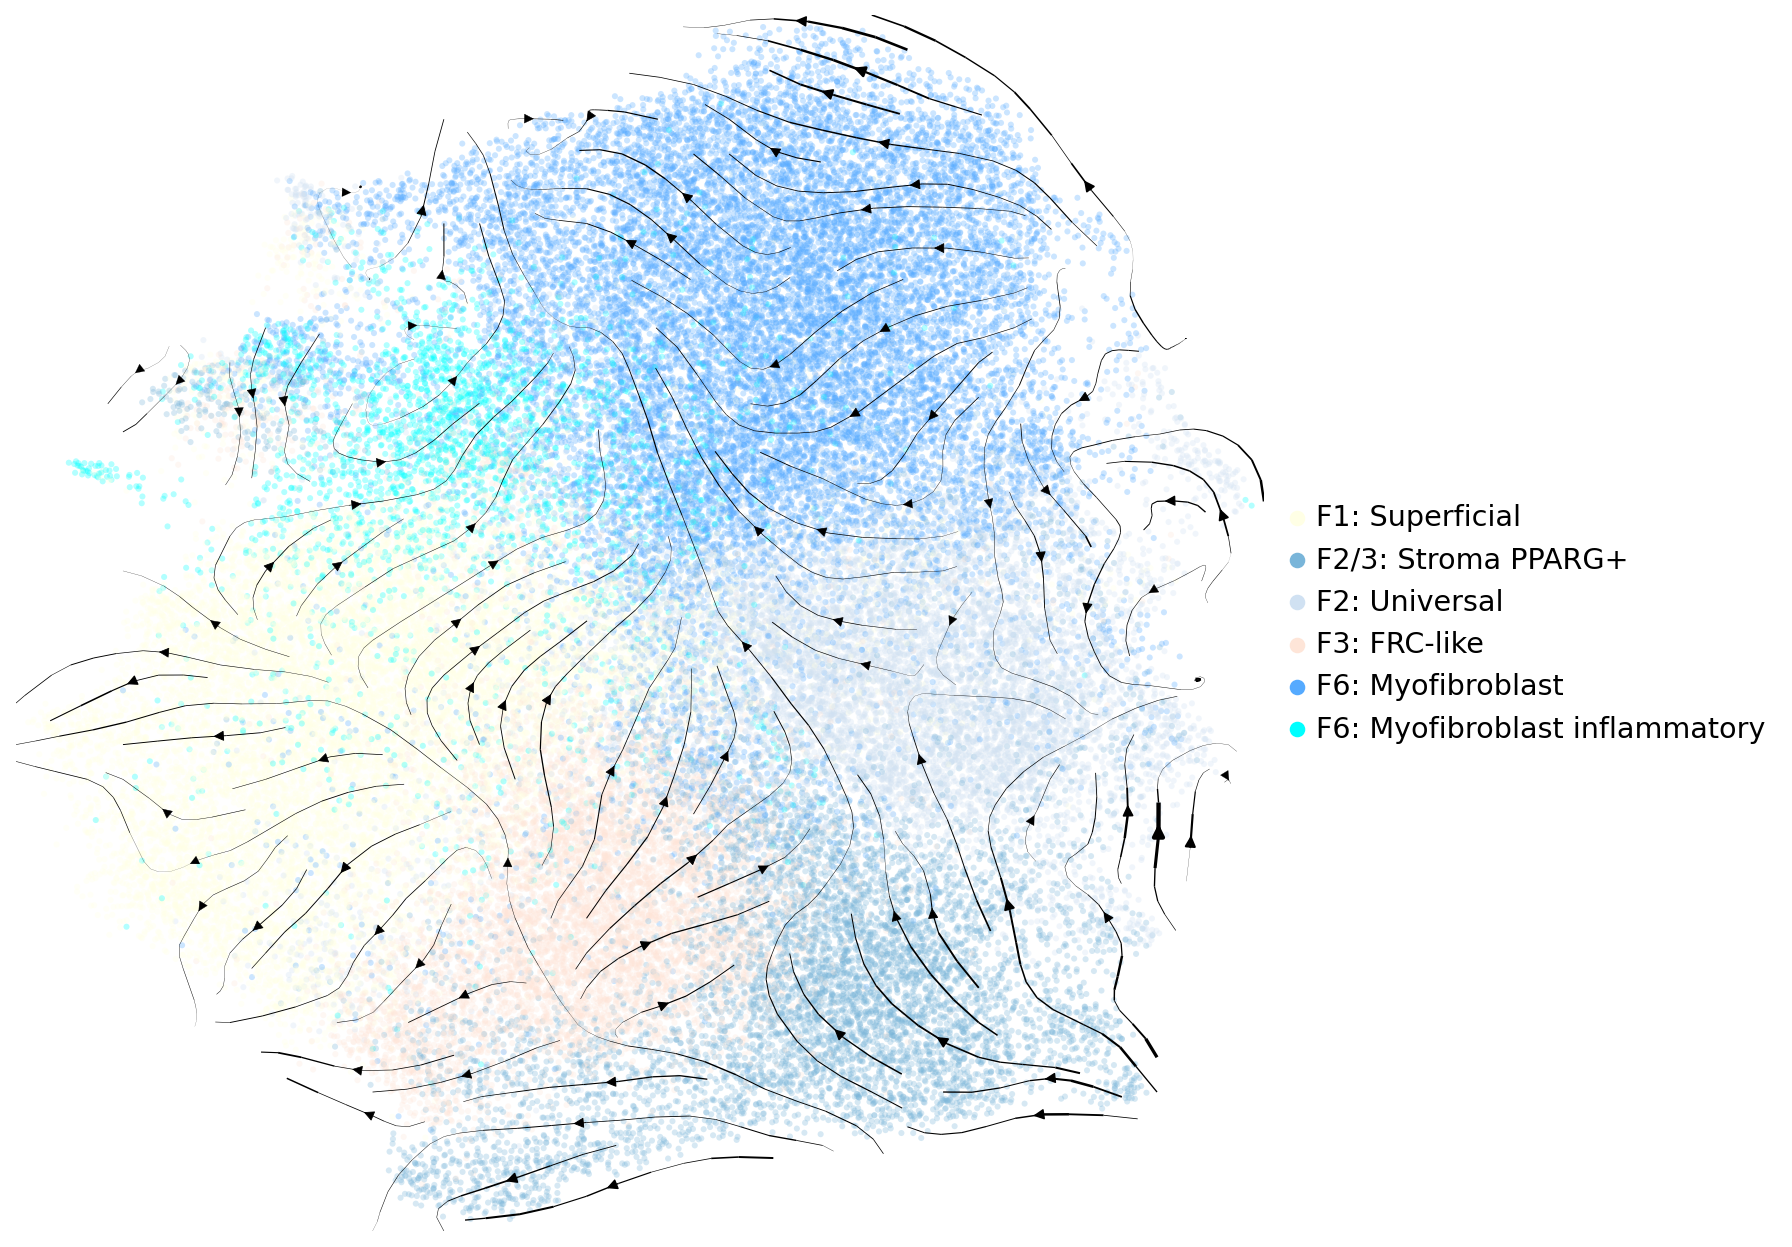

In [7]:
try:
    scv.pl.velocity_embedding_stream(
        adata, 
        basis='umap', 
        color='test2', 
        title='', 
        density=1.2   ,
        s=30,
        legend_loc="right")

except:
    1
 


# VELOCITY KERNEL

In [8]:
vk = cr.kernels.VelocityKernel(adata)
vk.compute_transition_matrix()


100%|██████████| 55826/55826 [00:24<00:00, 2277.81cell/s]


VelocityKernel[n=55826, model='deterministic', similarity='correlation', softmax_scale=np.float64(9.613)]

saving figure to file ./figures/scvelo__velocityembedding_nolabels.png


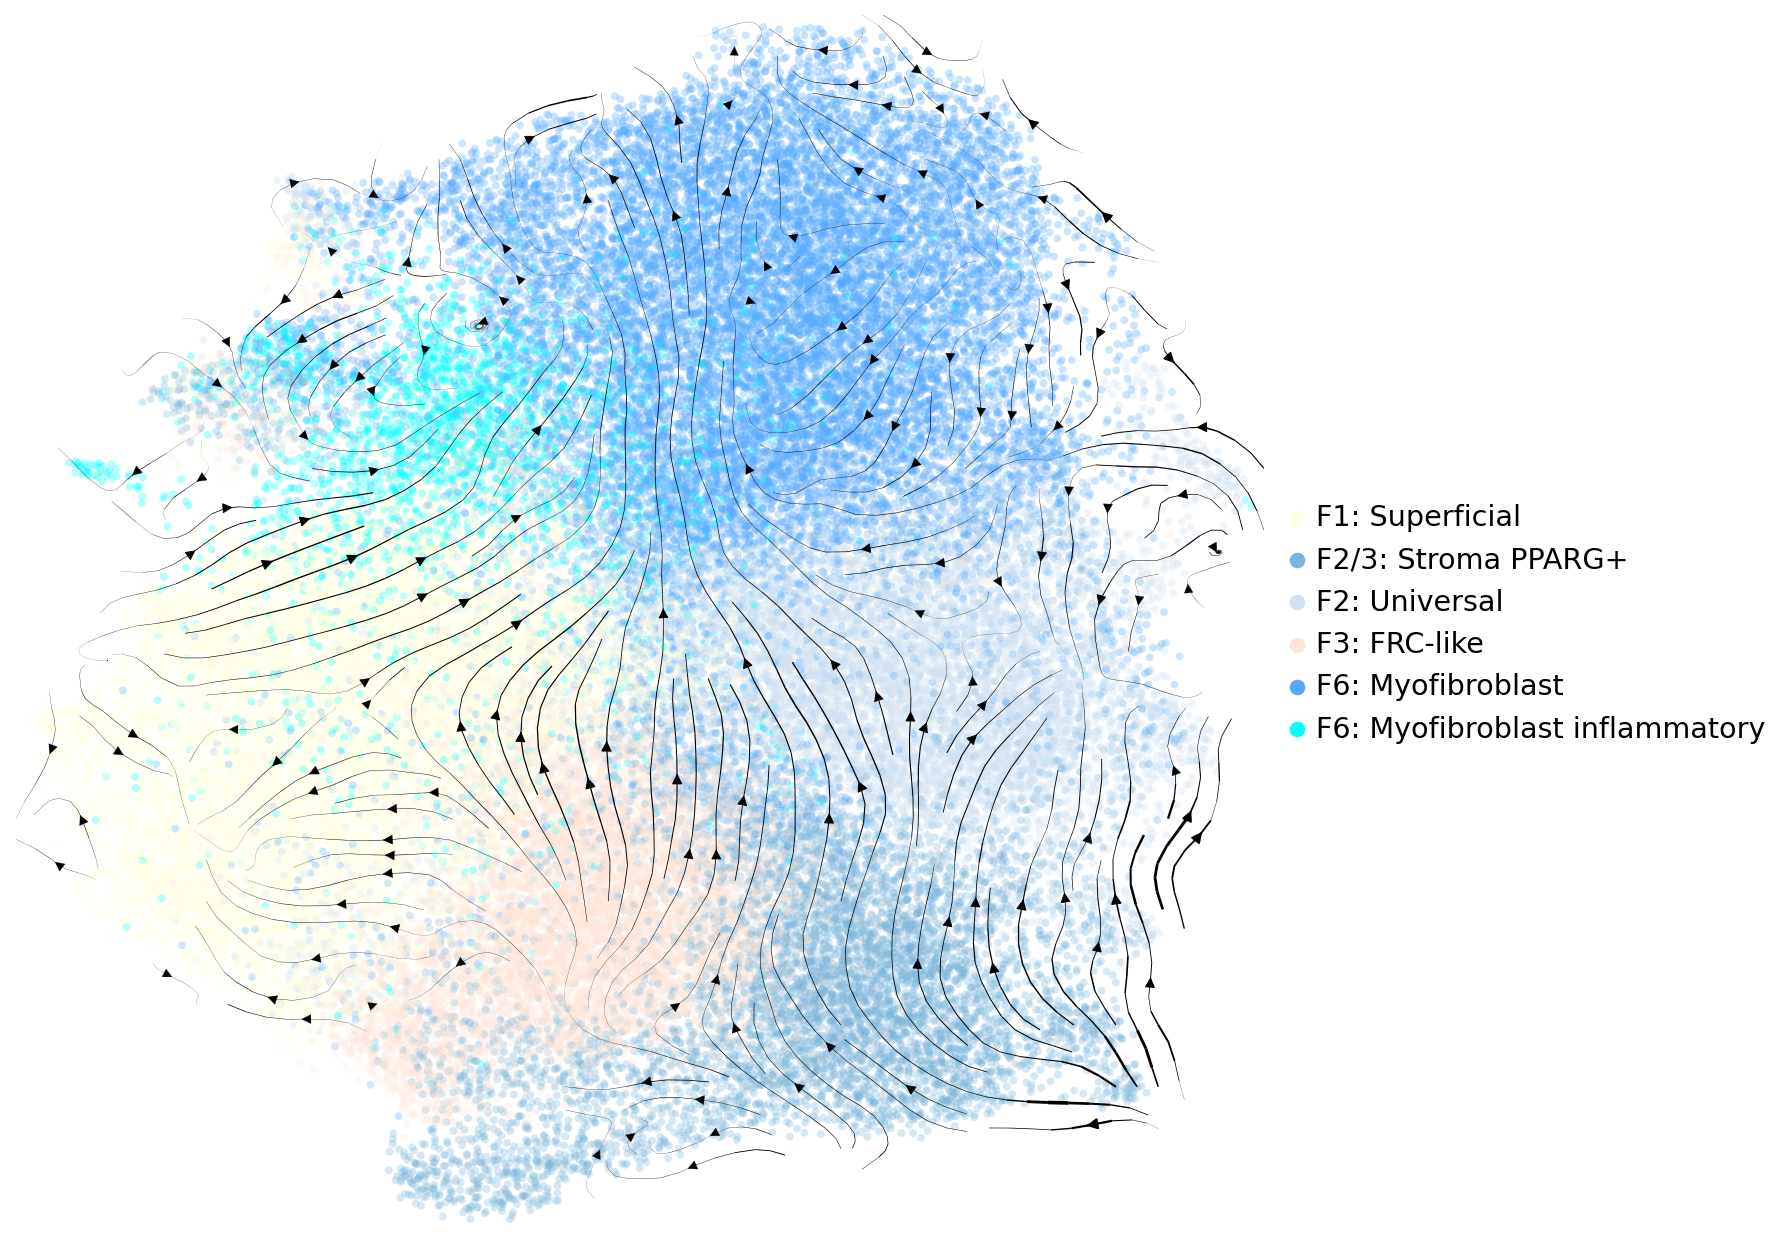

In [9]:
try:
    vk.plot_projection(color=['test2'], s=50, title='', save="_velocityembedding_nolabels.png", legend_loc="right")
    plt.show()
except:
    1

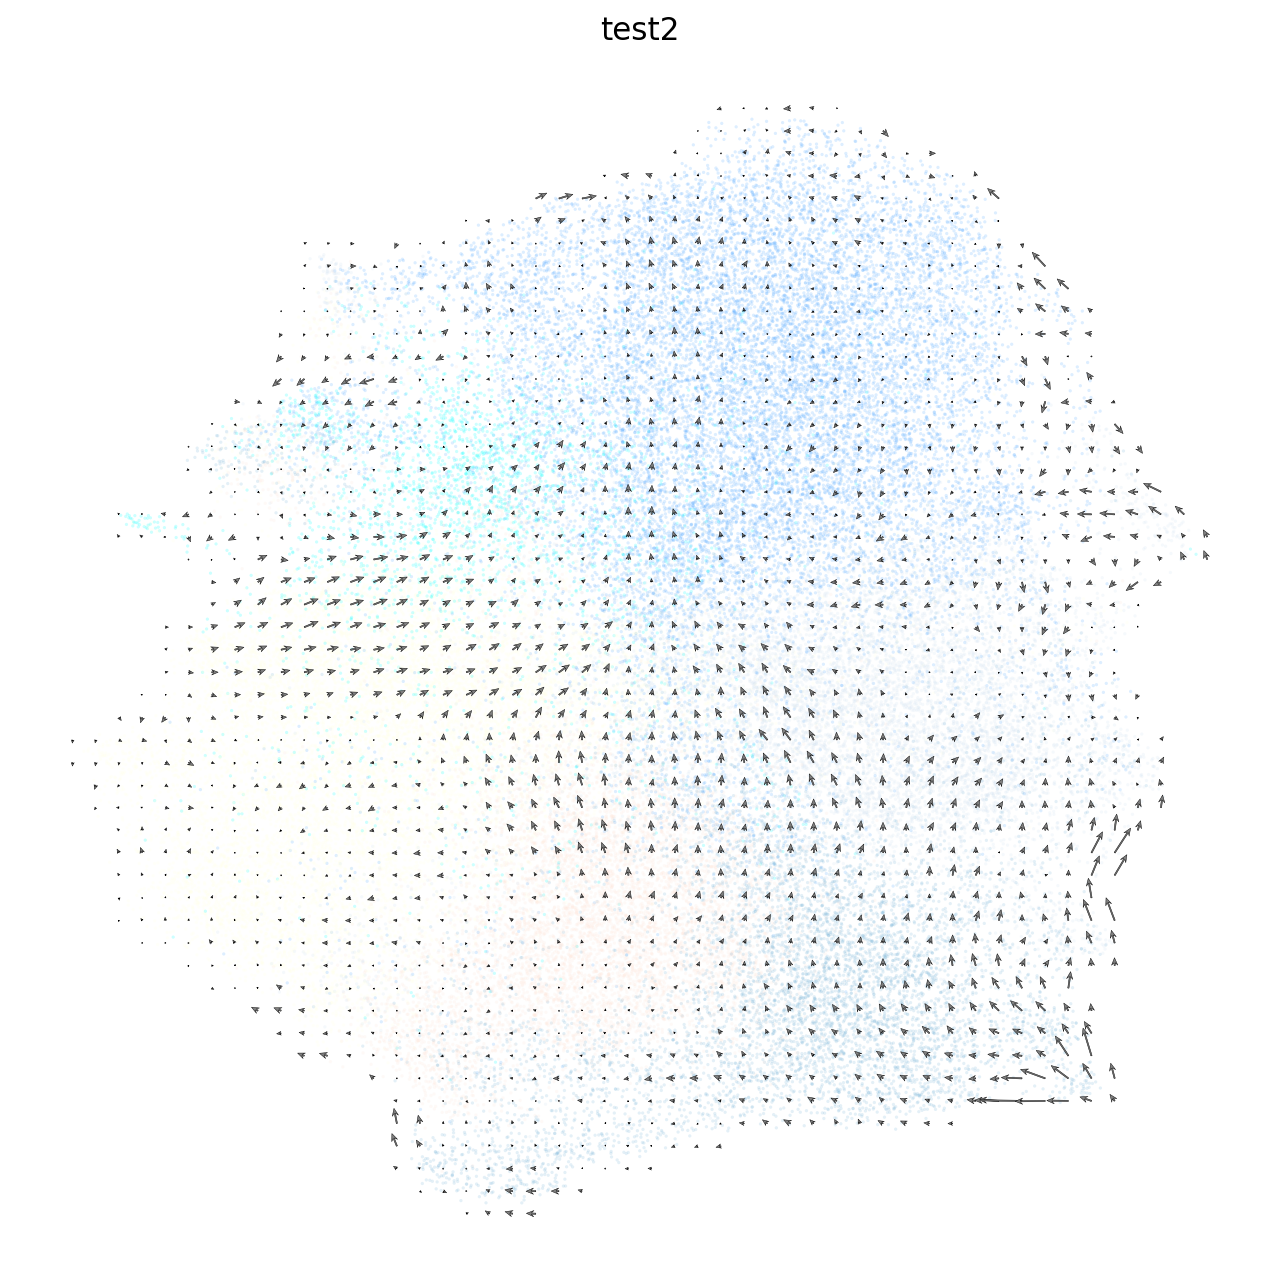

In [10]:
try:
    ax = vk.plot_projection(color=['test2'], stream=False)
except:
    1

In [ ]:
sc.pp.neighbors(adata,  n_neighbors=30, use_rep="X_scvi")

In [ ]:
# scv.pl.velocity_graph(adata, threshold=0.1, color='test2')


In [ ]:
scv.tl.velocity_pseudotime(adata)


In [ ]:
adata.uns['neighbors']['distances'] = adata.obsp['distances']
adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']
scv.tl.paga(adata, groups='test2')


In [ ]:
scv.pl.paga(adata, basis='umap', size=140, alpha=.2,
            min_edge_width=2, node_size_scale=6,
               edgecolor='black',   
            linewidth=5  ,     
           normalize_to_color=True,
          #  edge_width_scale=5
           # legend_loc="on data",
            title="",
            legend_fontoutline=2,
            legend_fontsize=5,
            fontoutline=2,
            fontsize=8,
            
           save="figVELOCITYpaga_nolabels_V2.png"
           )